<a href="https://colab.research.google.com/github/brit228/DS-Unit-4-Sprint-3-Neural-Networks/blob/master/module3-Intro-to-Keras/LS_DS_433_Keras_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [0]:
import keras
from keras.datasets import boston_housing
import numpy as np

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

x_mean = np.mean(x_train, axis=0)
x_std = np.std(x_train, axis=0)
x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

In [21]:
print(x_train.shape, y_train.shape)

(404, 13) (404,)


In [54]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, input_shape=(13,), activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="relu"))

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=1000, validation_split=0.1)
model.evaluate(x_test, y_test)

Train on 363 samples, validate on 41 samples
Epoch 1/1000
363/363 [==============================] - 2s 6ms/step - loss: 595.1833 - acc: 0.0000e+00 - val_loss: 505.5180 - val_acc: 0.0000e+00
Epoch 2/1000
363/363 [==============================] - 0s 73us/step - loss: 594.9864 - acc: 0.0000e+00 - val_loss: 505.2189 - val_acc: 0.0000e+00
Epoch 3/1000
363/363 [==============================] - 0s 73us/step - loss: 594.3264 - acc: 0.0000e+00 - val_loss: 503.9467 - val_acc: 0.0000e+00
Epoch 4/1000
363/363 [==============================] - 0s 70us/step - loss: 592.8042 - acc: 0.0000e+00 - val_loss: 501.1369 - val_acc: 0.0000e+00
Epoch 5/1000
363/363 [==============================] - 0s 69us/step - loss: 589.7223 - acc: 0.0000e+00 - val_loss: 497.7946 - val_acc: 0.0000e+00
Epoch 6/1000
363/363 [==============================] - 0s 67us/step - loss: 584.4042 - acc: 0.0000e+00 - val_loss: 490.5023 - val_acc: 0.0000e+00
Epoch 7/1000
363/363 [==============================] - 0s 74us/step - los

[11.676519655713848, 0.0]

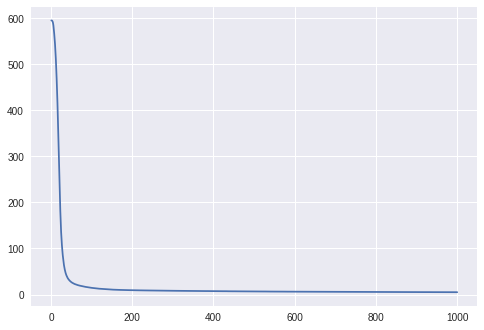

In [55]:
import matplotlib.pyplot as plt

plt.plot(list(range(1, len(history.history["loss"])+1)), history.history["loss"])
plt.show()

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [0]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [83]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000, 10)


In [86]:
from keras.layers import Flatten
model = Sequential()
model.add(Flatten(input_shape=(28,28,)))
model.add(Dense(80, input_shape=(28,28,), activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
history = model.fit(x_train, y_train, epochs=100, validation_split=0.2)
model.evaluate(x_test, y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_94 (Dense)             (None, 80)                62800     
_________________________________________________________________
dense_95 (Dense)             (None, 10)                810       
Total params: 63,610
Trainable params: 63,610
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 7s 152us/step - loss: 0.5320 - acc: 0.8126 - val_loss: 0.4349 - val_acc: 0.8452
Epoch 2/100
48000/48000 [==============================] - 5s 97us/step - loss: 0.3990 - acc: 0.8567 - val_loss: 0.3775 - val_acc: 0.8672
Epoch 3/100
48000/48000 [==============================] - 5s 104us/step - 

[0.6834687826037407, 0.8768]

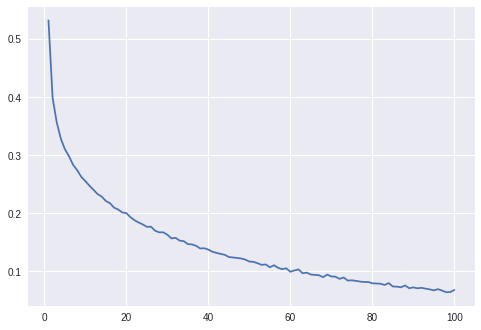

In [87]:
plt.plot(list(range(1, len(history.history["loss"])+1)), history.history["loss"])
plt.show()

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.